# Extract & Analyze Drought and Fire Condition Data From droughtmonitor.unl.edu and fire.ca.gov

## How to extract drought data:
    1. Go to https://droughtmonitor.unl.edu/DmData/DataTables.aspx
    2. For area type select "state", area select "California", and Statistic type select "Cummulative Percent Area"
    3. Export data as csv file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Loading tableExport.csv dataset

In [ ]:
data_path = "../data/drought_fire_data/"
fc_file_name = "tableExport.csv"

df = pd.read_csv(data_path + fc_file_name)

## Exploratory Data Analysis

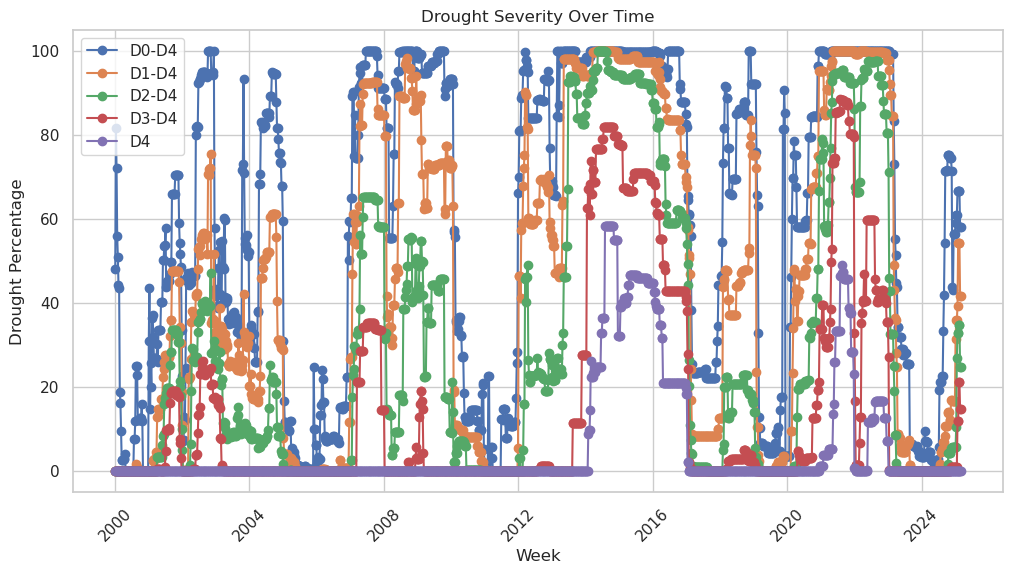

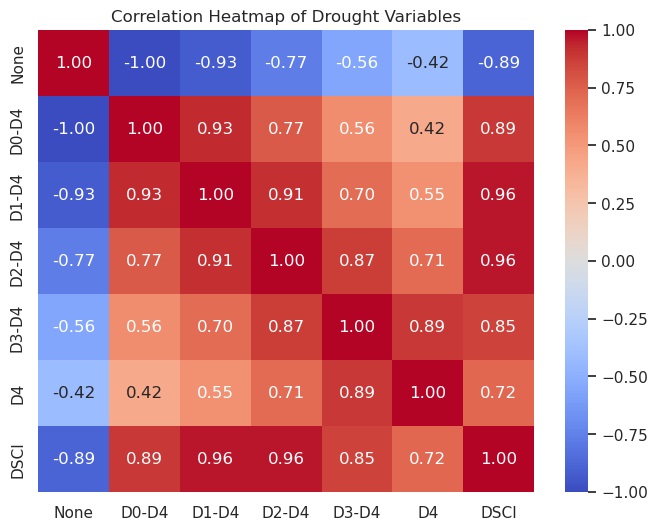

In [ ]:
# Convert 'Week' column to datetime
df['Week'] = pd.to_datetime(df['Week'])

# Set seaborn theme for better visuals
sns.set_theme(style="whitegrid")

# Plot drought severity over time
plt.figure(figsize=(12, 6))
for col in ['D0-D4', 'D1-D4', 'D2-D4', 'D3-D4', 'D4']:
    plt.plot(df['Week'], df[col], marker='o', label=col)

plt.xlabel("Week")
plt.ylabel("Drought Percentage")
plt.title("Drought Severity Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['Week']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Drought Variables")
plt.show()

Using a time-series plot, we can observe the how the different severities of drought stages vary each month.

## How to extract fire condition data:
    1. Go to https://www.fire.ca.gov/incidents
    2. Download dataset by clicking "all data as csv" button

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Loading mapdataall.csv dataset from  https://www.fire.ca.gov/incidents

In [ ]:
data_path = "../data/drought_fire_data/"
fc_file_name = "mapdataall.csv"

df = pd.read_csv(data_path + fc_file_name)

# Convert the column to datetime
df["incident_dateonly_created"] = pd.to_datetime(df["incident_dateonly_created"], errors="coerce")

In [ ]:
start_date = "2020-01-01"
end_date = "2025-01-01"

df_filtered = df[
    (df["incident_dateonly_created"] >= start_date) & 
    (df["incident_dateonly_created"] <= end_date)
].copy()

# Create the 'month' column
df_filtered["month"] = df_filtered["incident_dateonly_created"].dt.to_period("M")

monthly_counts = df_filtered.groupby("month").size()

print(f"Data is from {start_date} to {end_date}")

Data is from 2020-01-01 to 2025-01-01


## Exploratory Data Analysis

In [ ]:
# Inspect filtered data
total_incidents = df_filtered.shape[0]
print(f"Total incidents from {start_date} to {end_date}: {total_incidents}", )

Total incidents from 2020-01-01 to 2025-01-01: 1340


In [ ]:
# Inspect the filtered data
df_filtered.head()

,incident_name,incident_is_final,incident_date_last_update,incident_date_created,incident_administrative_unit,incident_administrative_unit_url,incident_county,incident_location,incident_acres_burned,incident_containment,...,incident_type,incident_id,incident_url,incident_date_extinguished,incident_dateonly_extinguished,incident_dateonly_created,is_active,calfire_incident,notification_desired,month
1469,Bear Fire,Y,2020-02-16T09:24:05Z,2020-02-15T17:48:27Z,CAL FIRE Humboldt-Del Norte Unit,NaN,Humboldt,"Bear Creek Road and Anderson Ford Road, Northw...",15.0,100.0,...,Wildfire,94f20083-2412-4058-bc16-afa6b45c3935,https://www.fire.ca.gov/incidents/2020/2/15/be...,NaN,NaN,2020-02-15,N,True,False,2020-02
1470,Antelope Fire,Y,2020-02-24T14:41:27Z,2020-02-17T15:04:08Z,USFS Tahoe National Forest,NaN,Sierra,"Hwy 49 and Fillippini Road, Sierraville",102.0,100.0,...,Wildfire,c9bb59f7-be32-4296-8c11-3f1233116827,https://www.fire.ca.gov/incidents/2020/2/17/an...,2020-02-20T14:40:00Z,2020-02-20,2020-02-17,N,False,False,2020-02
1471,Beegum Fire,Y,2020-02-24T14:32:24Z,2020-02-23T08:35:30Z,CAL FIRE Tehama-Glenn Unit,NaN,Tehama,"Off of Highway 36 West and Tedoc Rd, West of R...",75.0,100.0,...,Wildfire,f6e7a62d-4796-452d-8e41-66ed1aef6d63,https://www.fire.ca.gov/incidents/2020/2/23/be...,2020-02-24T14:32:00Z,2020-02-24,2020-02-23,N,True,False,2020-02
1472,Wood Fire,Y,2020-02-24T14:45:55Z,2020-02-23T17:50:20Z,Bureau of Land Management,NaN,Lassen,"Off Horselake Road and Woodranch Road, East of...",57.0,100.0,...,Wildfire,edd2012d-0574-46a1-97d5-9ca42e7c5912,https://www.fire.ca.gov/incidents/2020/2/23/wo...,2020-02-23T14:45:00Z,2020-02-23,2020-02-23,N,False,False,2020-02
1473,Baseball Fire,Y,2020-03-09T11:22:07Z,2020-02-25T14:17:21Z,Mendocino National Forest,NaN,"Glenn, Mendocino","Off Atchison Creek, East of Covelo",211.0,100.0,...,Wildfire,ad9ab6b9-53ed-417c-a490-6b594974f110,https://www.fire.ca.gov/incidents/2020/2/25/ba...,2020-03-03T11:21:00Z,2020-03-03,2020-02-25,N,False,False,2020-02


In [ ]:
# Descriptive stats for acres burned
print(f"=== Descriptive Stats for 'incident_acres_burned' ===")
print(f"        [from {start_date} to {end_date}]")
print(df_filtered["incident_acres_burned"].describe())

=== Descriptive Stats for 'incident_acres_burned' ===
        [from 2020-01-01 to 2025-01-01]
count    1.289000e+03
mean     5.321801e+03
std      4.710454e+04
min      2.000000e+00
25%      2.500000e+01
50%      7.100000e+01
75%      3.000000e+02
max      1.032648e+06
Name: incident_acres_burned, dtype: float64


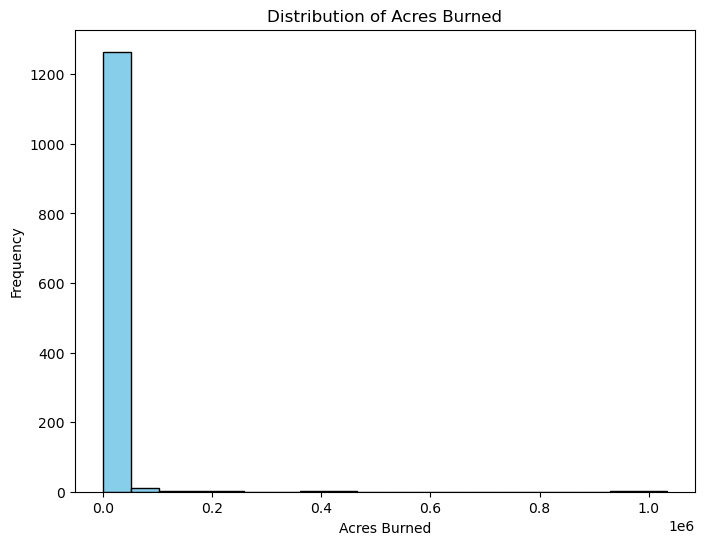

In [ ]:
# Histogram of acres burned
plt.figure(figsize=(8, 6))
plt.hist(df_filtered["incident_acres_burned"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Acres Burned")
plt.xlabel("Acres Burned")
plt.ylabel("Frequency")
plt.show()

While observing the amount of acres burned in California, we find that the median (71 acres) is much lower than the mean (5,322 acres), which suggests that a few large wildfires drive the high average. This is further supported by the histogram of the distribution of the acres burned supporting that the majority of wildfires that occur in California are relatively small but the most frequent.
Most fires, around 75%, burn 300 acres or less, meaning smaller fires are the majority, but a small percentage of fires contribute disproportionately to total acreage burned.

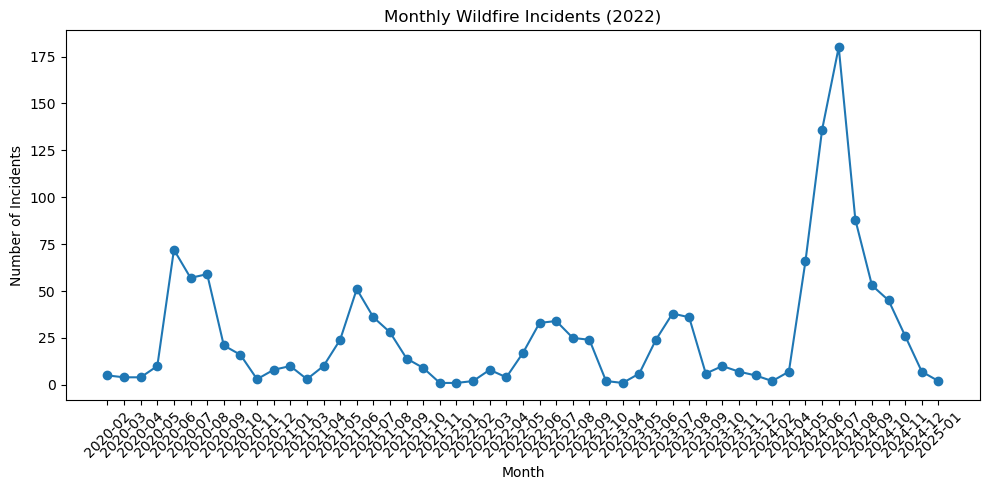

In [ ]:
# Example grouping by month (assuming 'incident_date_created' is datetime)
df_filtered["month"] = df_filtered["incident_dateonly_created"].dt.to_period("M")

monthly_counts = df_filtered.groupby("month").size()

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_counts.index.astype(str),  # Convert PeriodIndex to string for plotting
    monthly_counts.values,
    marker="o"
)
plt.title("Monthly Wildfire Incidents (2022)")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


When grouping the frequency of wildfire incidents by month, we are able to observe a noticable pattern of when wildfires most frequently occur, which could provide valuable information as a feature in trainingthe wildfire prediction model. 

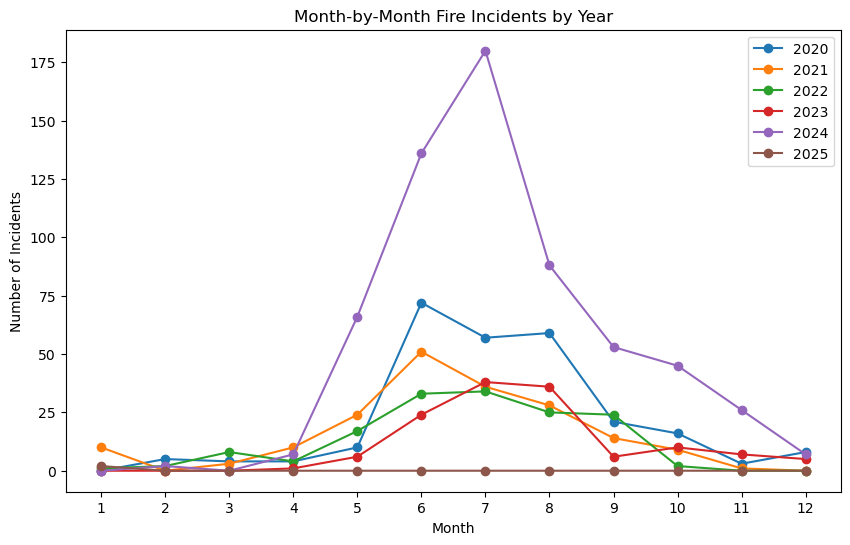

In [ ]:
df_filtered["year"] = df_filtered["incident_dateonly_created"].dt.year
df_filtered["month"] = df_filtered["incident_dateonly_created"].dt.month

year_month_counts = df_filtered.groupby(["year", "month"]).size().unstack(level=0, fill_value=0)

plt.figure(figsize=(10, 6))
for year in year_month_counts.columns:
    plt.plot(year_month_counts.index, year_month_counts[year], marker="o", label=str(year))

plt.title("Month-by-Month Fire Incidents by Year")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(range(1, 13))
plt.legend()
plt.show()


Another significant feature from the dataset is the number of fire incidents that occur plotted by months and groups in years, as we can observe how in general, the amount of fire incidents peak around the summer months. However, when we group by years, we observe the the relative amount of fire incidents is continuing to increase yearly after initially beginning to decrease after 2020. 

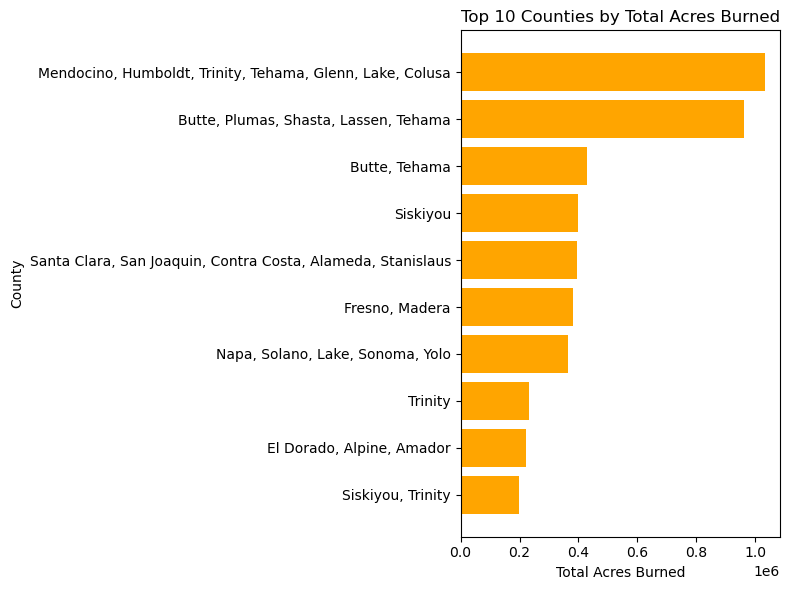

In [ ]:
county_acres = df_filtered.groupby("incident_county")["incident_acres_burned"].sum().sort_values(ascending=False)
top_10_counties = county_acres.head(10)

plt.figure(figsize=(8, 6))
plt.barh(top_10_counties.index, top_10_counties.values, color="orange")
plt.title("Top 10 Counties by Total Acres Burned")
plt.xlabel("Total Acres Burned")
plt.ylabel("County")
plt.gca().invert_yaxis()  # so the largest is at the top
plt.tight_layout()
plt.show()

Another potentially important feature that can be extracted is the amount of wildfires based on location. In the bar graph above, we are  able to observe the counties that are most likely to have a fire based on the amount acres burned in each county.